In [40]:
import pandas as ps
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno



In [41]:
df = ps.read_csv("ml_6k.csv") #sep=";")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,Парадайс,real_estate_agent,https://istra.cian.ru/sale/flat/307337604/,Истра,sale,flat,5,5,2,38.1,...,-1,"24,8 м²",6 м²,79689797143,-1,NaN,9-й Гвардейской Дивизии,45,Нахабино,NaN
1,Михаил Лукичев,realtor,https://istra.cian.ru/sale/flat/308569551/,Истра,sale,flat,3,5,1,28.5,...,-1,17 м²,7 м²,79151569045,-1,NaN,Юбилейная,14,Нахабино,NaN
2,ID 23728418,realtor,https://istra.cian.ru/sale/flat/307806292/,Истра,sale,flat,3,9,1,35.8,...,-1,-1,9 м²,79629205723,"2,5 м",NaN,9-й Гвардейской Дивизии,47,Нахабино,NaN
3,ID 31402099,realtor,https://istra.cian.ru/sale/flat/304802204/,Истра,sale,flat,4,4,2,67.0,...,-1,35 м²,16 м²,79166310184,"2,5 м",NaN,проспект Генерала Белобородова,32,Нахабино,мкр. Восточный
4,Эволюция недвижимости,real_estate_agent,https://istra.cian.ru/sale/flat/299778639/,Истра,sale,flat,3,5,2,43.3,...,-1,24 м²,6 м²,79167314180,-1,NaN,Босова,5,Нахабино,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                139 non-null    object 
 1   author_type           139 non-null    object 
 2   url                   139 non-null    object 
 3   location              139 non-null    object 
 4   deal_type             139 non-null    object 
 5   accommodation_type    139 non-null    object 
 6   floor                 139 non-null    int64  
 7   floors_count          139 non-null    int64  
 8   rooms_count           139 non-null    int64  
 9   total_meters          139 non-null    float64
 10  price                 139 non-null    int64  
 11  year_of_construction  139 non-null    object 
 12  object_type           139 non-null    object 
 13  have_loggia           139 non-null    object 
 14  parking_type          139 non-null    object 
 15  house_material_type   1

<Axes: >

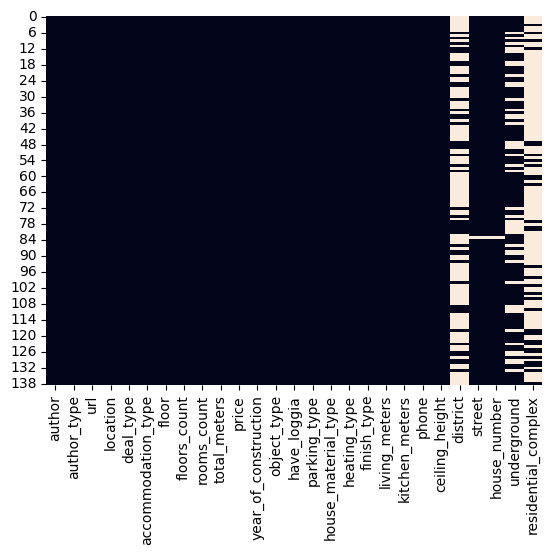

In [43]:
sns.heatmap(df.isnull(), cbar=False)

In [44]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [45]:
missing_percent = get_numerical_summary(df)

district : 96 (69.065%)
street : 1 (0.719%)
house_number : 1 (0.719%)
underground : 43 (30.935%)
residential_complex : 107 (76.978%)
